#Juan Carlos Apitz
#STAT510 Homework 2

####Required Python Modules:

In [1]:
#PANDAS
import pandas as pd
from pandas import DataFrame, Series

#NUMPY
import numpy as np

#SCIPY t and F distributions
from scipy.stats import t
from scipy.stats import f

#STATMODELS
import statsmodels.formula.api as sm
#import statsmodels.api as sm

#SEABORN plotting
import seaborn as sns

#MATPLOTLIB plotting
import matplotlib.pyplot as plt
%matplotlib inline

##Problem 1.3

Although the statement of the participant if there is a precise deterministic relation between plastic hardnes and elapsed time is technically correct, the veracity of the claim is highly unlikely. The participant's claim implies that there is an invariant relationship between the variables. In reality, the more plausible scenario is that the resulting plastic hardness varies for a given measure of elapsed time. If plastic hardness exhibits variability at each level of elapsed time, then regression analysis is precisely the appropriate approach for the analysis.

Furthermore, the participant's claim also implies that plastic hardness can be measured with infinite precission. At some small scale variability in measurement is bound to be present.

##Problem 1.22

First load the data set for the plastic hardness data

In [2]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH1DS/CH01PR22.txt'

df = pd.read_table(filename, delim_whitespace=True, names=['hardness','hours'])

In [3]:
df.head()

,hardness,hours
0,199,16
1,205,16
2,196,16
3,200,16
4,218,24


Next we fit the model

In [4]:
model = sm.ols(formula="hardness ~ hours", data=df).fit()

b0 = model.params[0]
b1 = model.params[1]
n = len(df)

###Part a.

The table below summarizes the results of fitting the model to plastic hardness data:

In [5]:
print model.summary()

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Tue, 22 Sep 2015   Prob (F-statistic):           2.16e-12
Time:                        14:18:06   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    168.6000      2.657     63.454      0.0

/home/jcapitz/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


#####The estimated regression function is:

$\hat{y} = 168.6 + 2.0344x$

Where $\hat{y}$ represents the estimated hardness and $x$ represents the elapsed time in hours.

#####Plot of the estimated regression function and the data:

The plot indicates that the data fits reasonably well the linear model represented by the regression function.

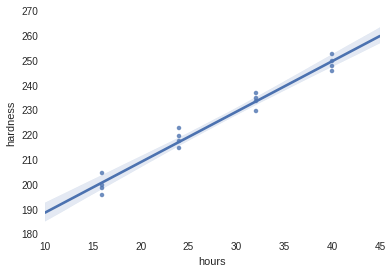

In [6]:
ax = sns.regplot(x="hours", y="hardness", data=df)

###Part b.

To obtain a point estimate of the mean hardness when X = 40 hours, we simply let X = 40 be the input into the estimated regression function:

In [7]:
x = DataFrame({'hours':40}, index = range(1))

print 'The point estimate of the mean hardness when X = 40 is %0.2f Brinell units' %model.predict(x)[0]

The point estimate of the mean hardness when X = 40 is 249.97 Brinell units


###Part c.

The point estimate of the change in mean hadness when X is increased by one hour is simply the estimated coefficient for the X variable (hours) from the estimated regression function:

In [8]:
print '''The point estimate of the change in mean hardness when X is increased by one unit is %0.3f Brinell units per hour.
''' %model.params['hours']

The point estimate of the change in mean hardness when X is increased by one unit is 2.034 Brinell units per hour.



##Problem 1.26

###Part a.

Obtain resisuals and check wether the sum adds to 0:

In [9]:
model.resid

0    -2.150
1     3.850
2    -5.150
3    -1.150
4     0.575
5     2.575
6    -2.425
7     5.575
8     3.300
9     0.300
10    1.300
11   -3.700
12    0.025
13   -1.975
14    3.025
15   -3.975
dtype: float64

Below we can see that the sum of the residuals is zero:

In [10]:
print 'The sum of the errors is %0.3f' %sum(model.resid)

The sum of the errors is 0.000


###Part b.

A point estimate of the variance is given by:
$$\hat{\sigma}^2 = \frac{\sum \left( y_i - \hat{y}_i \right)^2}{n-2}$$

The point estimate of the variance is calculated below:

In [11]:
variance = sum(model.resid**2)/(n-2)

print 'The variance is %0.2f.' %variance

The variance is 10.46.


The estimate for sigma is given by:

$$\hat{\sigma} = \sqrt{\frac{\sum \left( y_i - \hat{y}_i \right)^2}{n-2}}$$

Sigma is expressed in Brinell units and is calculated below:

In [12]:
stdev = np.sqrt(variance)

print 'The standard deviation is %.2f' %stdev

The standard deviation is 3.23


##Problem 1.31

No it would not. The measurements of hardness taken of the same item at different time intervals is a time series and each observation is not necessarily independent of one another. Each succesive measure of hardness will depend on the previous level of hardness. This implies that the error terms will be serially correlated.

##Question 2

To show $\sum K_i^2 = \frac{1}{S_{xx}}$ we recognize that:

$$K_i^2 = \frac{\left(x_i-\bar{x}\right)^2}{\left(S_{xx}\right)^2}$$

then:

$$\sum K_i^2 = \sum \frac{\left(x_i-\bar{x}\right)^2}{\left(S_{xx}\right)^2}$$

$$ = \frac{1}{\left(S_{xx}\right)^2}\sum \left(x_i - \bar{x}\right)^2$$

$$ = \frac{S_{xx}}{\left(S_{xx}\right)^2}$$

$$ = \frac{1}{S_{xx}}$$

##Question 3

To find the variance of $b_0$ we substitute $b_0 = \bar{Y} - b_1\bar{X}$ and workout the variance:

$$V\left(b_0\right) = V\left(\bar{Y} - b_1\bar{X}\right)$$

$$ = V\left(\bar{Y}\right) - 2 \bar{X}Cov\left(\bar{Y},b_1\right)+ \bar{X}^2 V\left(b_1\right)$$

$$ = \frac{\sigma^2}{n} - 2 \bar{X}Cov\left(\bar{Y},b_1\right)+ \bar{X}^2 \frac{\sigma^2}{S_{xx}}$$

$$\text{since }Cov\left(\bar{Y},b_1\right) = 0 \text{ by independence of the }Y_i \text{ then:}$$

$$ V\left(b_0\right) = \frac{\sigma^2}{n} + \bar{X}^2 \frac{ \sigma^2}{S_{xx}}$$

$$ = \sigma^2 \left[\frac{1}{n} + \frac{\bar{X}^2}{S_{xx}}\right]$$

##Problem 2.7

We can calculate the standard error of the $b_1$ coefficient or read it of the summary table.

$$SE(b_1)=\frac{\hat{\sigma}}{\sqrt{\sum\left(x_i - \bar{x}\right)^2}}$$

In [13]:
stderr_b1 = np.sqrt(variance/sum((df['hours']-np.mean(df['hours']))**2))

print 'The standard error is %.3f.' %stderr_b1

The standard error is 0.090.


###Part a.

Now we obtain the critical value $t_{\alpha/2,n-2}$ by finding the inverse $\alpha/2=CDF = 0.005$ value from the t-distribution with $14$ degrees of freedom:

In [14]:
tcrit = abs(t.ppf(0.005, n-2, loc=0, scale=1))

print 'The t critical value is %0.3f' %tcrit

The t critical value is 2.977


Now we can construct an 99% interval for $b_1$. This interval is given by:

$$b_1 \pm t_{0.005,14}SE(b_1)$$

In [15]:
CI_99 = [b1-tcrit*stderr_b1, b1+tcrit*stderr_b1]

print 'The 99 percent confidence interval is (%.3f, %.3f)' %(CI_99[0],CI_99[1])

The 99 percent confidence interval is (1.765, 2.303)


###Part b.

The hypothesis test is as follows:

$H_o: \beta_1 = 2$

$H_a: \beta_1 \neq 2$

The decision rule is that if $\left|t_{stat}\right|>\left|t_{0.005,14}\right|$, we would reject the null hypothesis $H_o$ and fail to reject $H_o$ otherwise. We calculate $t_{stat}$ below:

$$t_{stat}=\frac{b_1-\beta_1^{null}}{SE(b_1)}\approx\frac{2.03-2}{0.09}\approx 0.38$$

A better approximation is computed below:

In [16]:
beta_null = 2

tstat = (b1-beta_null)/stderr_b1

print 'The t statistic value is %0.3f' %tstat

The t statistic value is 0.380


Since $\left|t_{stat}\right|<\left|t_{0.005,14}\right| = 2.977$ we fail to reject $H_o$.

The p-value is given below:

In [17]:
pval = 2*(1-t.cdf(tstat,n-2))

print 'The p-value is %.3f' %pval

The p-value is 0.709


###Part c.

Since the standard is being exceeded by 0.3 Brinell, that means $\beta_1 - \beta_1^{null} = 0.3$, then the actual parameter $\beta_1 = 2.3$. To calculate the power of the test when $\beta_1 = 2.3$, we need to calculate $1-P\left(t_{stat} \not\in RR\ |\  \beta_1 = 2.3 \right)$, where $RR$ is the rejection region of the test from part b). This is the power of the test.

From part b) we know the rejection region is:

$$RR = \left\{ \left|\frac{b_1-\beta_1^{null}}{SE\left(b_1\right)}\right| > t_{crit} \right\}$$

$$ = \left\{ b_1 > \beta_1^{null}+t_{crit}SE\left(b_1\right) \text{ or } b_1 < \beta_1^{null}-t_{crit}SE\left(b_1\right) \right\}$$

Therefore:

$$P\left(t_{stat} \not\in RR\ |\  \beta_1 \right) = P\left( \beta_1^{null}-t_{crit}SE\left(b_1\right) < b_1 < \beta_1^{null}+t_{crit}SE\left(b_1\right) \ \big|\  \beta_1 \right)$$

and:

$$Power(\beta_1) = 1 - P\left( \beta_1^{null}-t_{crit}SE\left(b_1\right) < b_1 < \beta_1^{null}+t_{crit}SE\left(b_1\right) \ \bigr|\  \beta_1 \right)$$

$$ = 1 - P\left( \frac{\beta_1^{null}-\beta_1-t_{crit}SE\left(b_1\right)}{\sigma\{b_1\}} < t < \frac{\beta_1^{null}-\beta_1+t_{crit}SE\left(b_1\right)}{\sigma\{b_1\}} \ \biggr|\  \beta_1 \right)$$

Below we perform the power calculations for $\alpha  = 0.01$ and $t_{crit}=t_{0.005,14}=2.9768427$:

In [18]:
beta1 = 2.3

sigma_b1 = 0.1

tleft = (beta_null - beta1 - tcrit * stderr_b1)/sigma_b1

tright = (beta_null - beta1 + tcrit * stderr_b1)/sigma_b1

pType_2err = t.cdf(tright,n-2) - t.cdf(tleft,n-2)

power = 1 - pType_2err

print 'The power of the test is %.3f' %power

The power of the test is 0.619


Hence $Power(\beta_1=2.3)=0.619$ for $\alpha = 0.01$.

##Problem 2.16

###Part a.

First calculate $\bar{X}$ and $S_{xx}$:

In [19]:
X = df.loc[:,'hours']

Xh = DataFrame({'hours':30}, index = range(1))

Xbar = np.mean(X)

Sxx = np.sum((X - Xbar)**2)

In [20]:
print Xbar

28.0


In [21]:
print Sxx

1280.0


$\hat{Y}$ is given from the model:

In [22]:
yhat = model.predict(Xh)[0]

print yhat

229.63125


Then we find the MSE of the model and calculate the standard error of $\hat{Y}$:

In [23]:
MSE = model.mse_resid

print MSE

10.4589285714


The standard error of $\hat{Y}$ is approximated by:

$$S\left(\hat{Y}\right) = \sqrt{MSE\left[\frac{1}{n} + \frac{\left(X_h - \bar{X}\right)^2}{S_{xx}}\right]}$$

which we calculate below:

In [24]:
var_yhat = MSE * ((1/ n) + ((Xh - Xbar)**2)/Sxx).loc[0,'hours']

stderr_yhat = np.sqrt(var_yhat)

print stderr_yhat

0.180787587477


The $98\%$ confidence interval is given by $\hat{Y}\pm t_{0.01,14}\ \ S\left(\hat{Y}\right)$ and is calculated below:

In [25]:
tcrit = abs(t.ppf(0.01, n-2, loc=0, scale=1))

CI_98 = [yhat-tcrit*stderr_yhat, yhat+tcrit*stderr_yhat]

print 'The 98 percent confidence interval is (%0.2f, %0.2f)' %(CI_98[0],CI_98[1])

The 98 percent confidence interval is (229.16, 230.11)


This interval tells us that the true mean hardness value in Brinell units after 30 hours have elapsed, will be contained in the interval $\left(229.16,\ 230.11\right)$ $98\%$ of the time.

###Part b.

Here the calculations are similar to part a. above, except that for the prediction interval we use the following standard error:

$$S\left(predict\right) = \sqrt{MSE\left[1+\frac{1}{n} + \frac{\left(X_h - \bar{X}\right)^2}{S_{xx}}\right]}$$

which we calculate below:

In [26]:
var_pred = MSE * (1 + (1/ n) + ((Xh - Xbar)**2)/Sxx).loc[0,'hours']

stderr_pred = np.sqrt(var_pred)

print stderr_pred

3.23907590575


The $98\%$ confidence interval is given by $\hat{Y}_{predict}\pm t_{0.01,14}\ \ S\left(predict\right)$ and is calculated below:

In [27]:
CI_98_pred = [yhat-tcrit*stderr_pred, yhat+tcrit*stderr_pred]

print 'The 98 percent prediction interval is (%0.2f, %0.2f).' %(CI_98_pred[0],CI_98_pred[1])

The 98 percent prediction interval is (221.13, 238.13).


This interval tells us that the true hardness value in Brinell units for a new molded test item after 30 hours have elapsed, will be contained in the interval $\left(221.13,\ 238.13\right)$ $98\%$ of the time. Notice that this is a much wider interval relative to the one in part a., reflecting the greater variability of a prediction which of course deviates from the mean response $\hat{Y}$.

##Problem 2.26

###Part a.

With a few comands we can set up the ANOVA table shown below:

In [28]:
import statsmodels.api as sms

table = sms.stats.anova_lm(model, typ=2)

table.insert(2, 'mean_sq', table['sum_sq']/table['df'])

table = table.set_value('total', ['sum_sq', 'df'], [np.sum(table['sum_sq']),np.sum(table['df'])])

table.index = ['Model', 'Residuals','Total']

table

,sum_sq,df,mean_sq,F,PR(>F)
Model,5297.5125,1,5297.512500,506.506232,2.158814e-12
Residuals,146.4250,14,10.458929,NaN,NaN
Total,5443.9375,15,NaN,NaN,NaN


###Part b.

We can conduct a $F$ test of the following null and alternative hypothesis:

$H_0:\ \beta_1 = 0$

$H_a:\ \beta_1 \neq 0$

The decision rule is:

If $F \leq F_{(0.99,\ 14)}$, then we fail to reject $H_0$.

If $F > F_{(0.99,\ 14)}$, then we reject $H_0$.

In [29]:
fcrit = f.ppf(0.99, 1, n-2)

print 'The F critical value is %0.2f' %fcrit

The F critical value is 8.86


From the ANOVA table we have $F = 506.51$. Since $F \gg F_{(0.99,\ 14)}$, we reject $H_0$ and conclude that there exist a linear association between plastic hardness and the elapsed time.